# Part1: Data Preprocessing

## Importing libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Data science works/NLP-Restruant Review Classification/Restaurant_Reviews.tsv', delimiter='\t', quoting = 3)

In [4]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


## Data exploration

In [5]:
dataset.shape

(1000, 2)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [7]:
dataset.columns

Index(['Review', 'Liked'], dtype='object')

In [8]:
dataset.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


## Dealing with missing values

In [9]:
dataset.isnull().values.any()

False

## Countplot

<Axes: ylabel='count'>

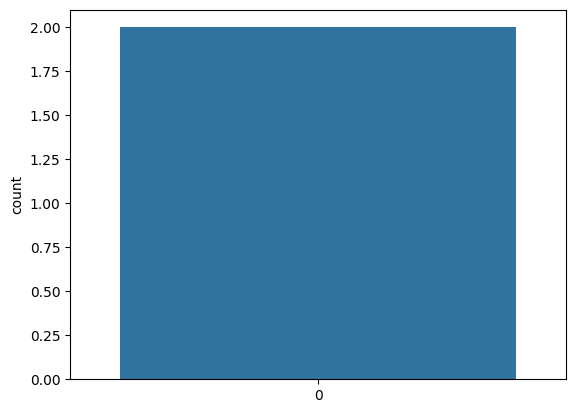

In [10]:
sns.countplot(dataset['Liked'].unique())

In [11]:
#positive reviews
(dataset.Liked==1).sum()

500

In [12]:
#negative reviews
(dataset.Liked==0).sum()

500

## Length of messages

In [13]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [14]:
dataset['Length'] = dataset['Review'].apply(len)

In [15]:
dataset.head()

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


<Axes: ylabel='Frequency'>

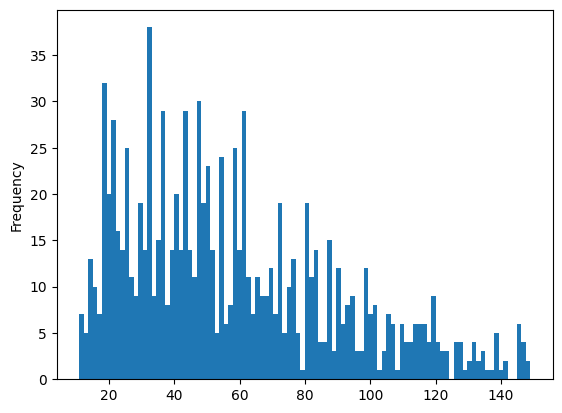

In [16]:
# Histogram
dataset['Length'].plot(bins=100, kind='hist')

In [17]:
dataset.Length.describe()

count    1000.000000
mean       58.315000
std        32.360052
min        11.000000
25%        33.000000
50%        51.000000
75%        80.000000
max       149.000000
Name: Length, dtype: float64

In [18]:
# Longest message
dataset['Review'][dataset['Length']==149].iloc[0]

'The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).'

In [19]:
# Ghortest message
dataset['Review'][dataset['Length']==11].iloc[0]

'DELICIOUS!!'

In [20]:
positive = dataset[dataset['Liked']==1]

In [21]:
negative = dataset[dataset['Liked']==0]

In [22]:
positive.head()

,Review,Liked,Length
0,Wow... Loved this place.,1,24
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59
8,The fries were great too.,1,25
9,A great touch.,1,14


In [23]:
negative.head()

,Review,Liked,Length
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
5,Now I am getting angry and I want my damn pho.,0,46
6,Honeslty it didn't taste THAT fresh.),0,37
7,The potatoes were like rubber and you could te...,0,111


## Cleaning the text

In [24]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
corpus = []

for i in range (0,1000):
  review = re.sub('[^a-zzA-Z]',' ',dataset['Review'][i])
  review = review.lower()
  review = review.split()
  # print(review)

  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  # print(all_stopwords)
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)] # single linre for loop
  review = ' '.join(review)
  # print(review)
  corpus.append(review)

In [26]:
print(len(corpus))

1000


In [27]:
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

## Creating bag of words Model

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
cv = CountVectorizer(max_features = 1500)

In [30]:
x = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1]

In [31]:
x.shape

(1000, 1500)

In [32]:
y.shape

(1000,)

In [33]:
print(x[0])

[0 0 0 ... 0 0 0]


## Splitting the dataset

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [35]:
x_train.shape

(800, 1500)

In [36]:
x_test.shape

(200, 1500)

In [37]:
y_train.shape

(800,)

In [38]:
y_test.shape

(200,)

# Part2: Building the model

## 1) Bayes Classifier

In [39]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(x_train,y_train)

GaussianNB()

In [40]:
y_pred=classifier_nb.predict(x_test)

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [42]:
acc = accuracy_score(y_test,y_pred)

In [43]:
print(acc*100)

61.5


In [44]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[48 55]
 [22 75]]


## 2)XGBoost Classifier

In [45]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier()
classifier_xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [46]:
y_pred=classifier_xgb.predict(x_test)

In [47]:
acc = accuracy_score(y_test,y_pred)

In [48]:
print(acc*100)

77.0


In [49]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[92 11]
 [35 62]]


In [50]:
# save model as xgb.pkl
import pickle

# Save the trained model
with open('xgb.pkl', 'wb') as file:
    pickle.dump(classifier_xgb, file)


# Part3: Prediction of single review

In [58]:

single_observation = ["The people were too bad."]
transformed_data = cv.transform(single_observation).toarray()


In [59]:
pred = classifier_xgb.predict(transformed_data)

In [60]:
if pred==1:
  print('postive rsponse')
else:
  print('negative response')

negative response


In [61]:
from sklearn.feature_extraction.text import CountVectorizer

# Create an instance of CountVectorizer
vectorizer = CountVectorizer()

# Fit the CountVectorizer to your text data
text_data = ["I love coding", "Coding is fun"]
vectorizer.fit_transform(text_data)

# Now you can use the fitted CountVectorizer for feature extraction
features = vectorizer.transform(text_data)
print(features)

  (0, 0)	1
  (0, 3)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
